In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/MiB Dataset/english_tweets.csv")
df

In [3]:
df.columns

Index(['Unnamed: 0', 'user_id', 'screen_name', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'url', 'lang', 'description', 'text', 'retweet_count', 'reply_count',
       'possibly_sensitive', 'num_hashtags', 'num_urls', 'type'],
      dtype='object')

In [4]:
type_counts = df['type'].value_counts()
print(type_counts)

type
real           7704653
social_spam    2020688
Name: count, dtype: int64


In [10]:
# Calculate mean, median, and standard deviation for each feature separately
features = ['statuses_count', 'followers_count', 'friends_count',
            'favourites_count', 'listed_count', 'retweet_count',
            'reply_count', 'possibly_sensitive', 'num_hashtags',
            'num_urls']

for feature in features:
    mean_real = df[df['type'] == 'real'][feature].mean()
    median_real = df[df['type'] == 'real'][feature].median()
    std_real = df[df['type'] == 'real'][feature].std()

    mean_spam = df[df['type'] == 'social_spam'][feature].mean()
    median_spam = df[df['type'] == 'social_spam'][feature].median()
    std_spam = df[df['type'] == 'social_spam'][feature].std()

    print(f"Statistics for '{feature}' feature:")
    print(f"Real - Mean: {mean_real}, Median: {median_real}, Std: {std_real}")
    print(f"Social Spam - Mean: {mean_spam}, Median: {median_spam}, Std: {std_spam}")
    print()

Statistics for 'statuses_count' feature:
Real - Mean: 21467.89894418347, Median: 10304.0, Std: 32881.65916434602
Social Spam - Mean: 9626.165501057065, Median: 10893.0, Std: 14019.951557513503

Statistics for 'followers_count' feature:
Real - Mean: 1750.111976490051, Median: 453.0, Std: 20507.22330118585
Social Spam - Mean: 2097.6829723341752, Median: 773.0, Std: 19205.027418470283

Statistics for 'friends_count' feature:
Real - Mean: 728.2155829730424, Median: 385.0, Std: 1689.0794277977773
Social Spam - Mean: 1617.7702985319852, Median: 1441.0, Std: 4258.095923666818

Statistics for 'favourites_count' feature:
Real - Mean: 5778.125232765187, Median: 2222.0, Std: 12928.728140175732
Social Spam - Mean: 59.34885444957361, Median: 0.0, Std: 689.6972868544615

Statistics for 'listed_count' feature:
Real - Mean: 25.54075115388065, Median: 3.0, Std: 188.4485922818676
Social Spam - Mean: 10.060588274884594, Median: 3.0, Std: 81.02805740690356

Statistics for 'retweet_count' feature:
Real - M

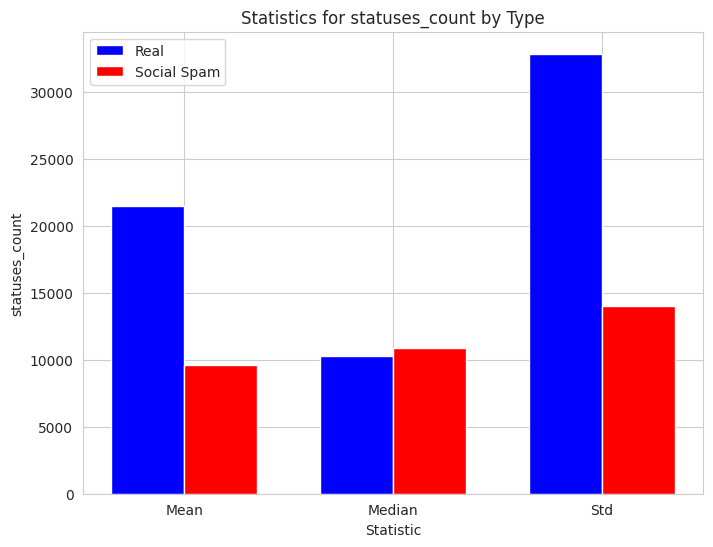

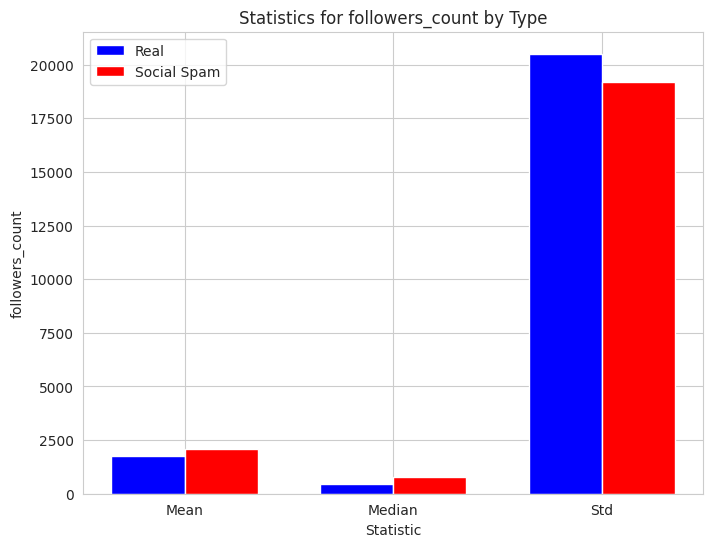

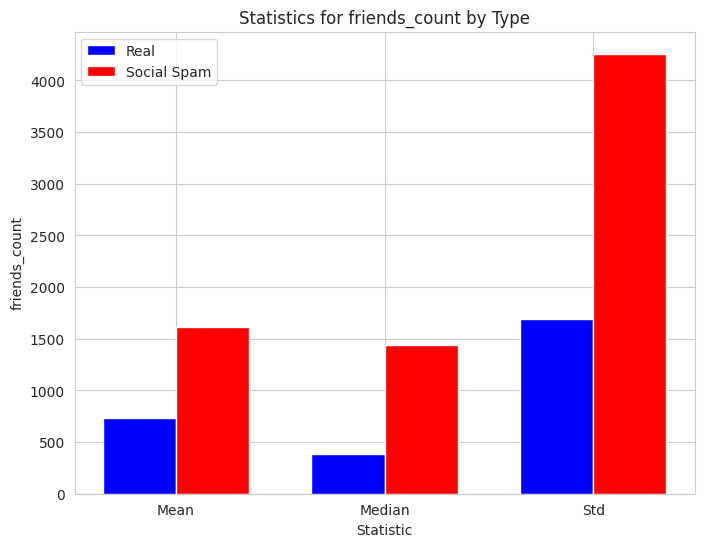

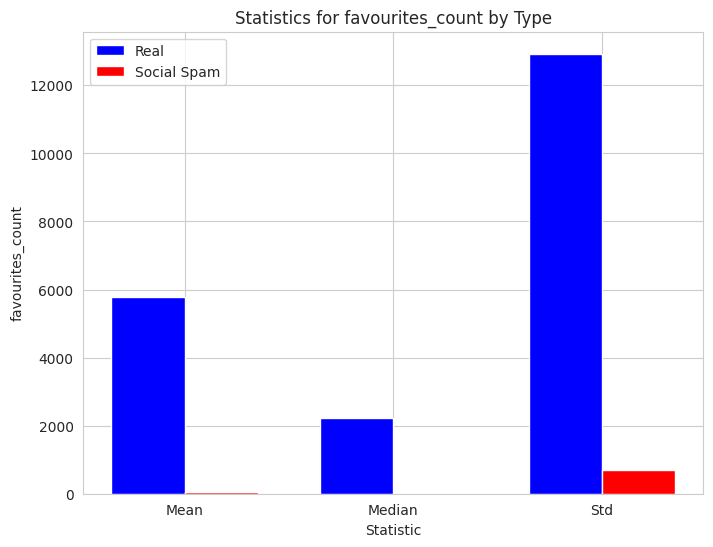

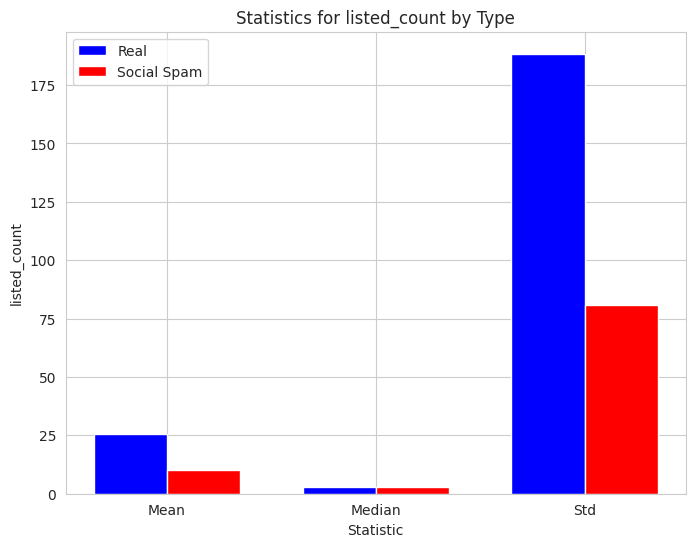

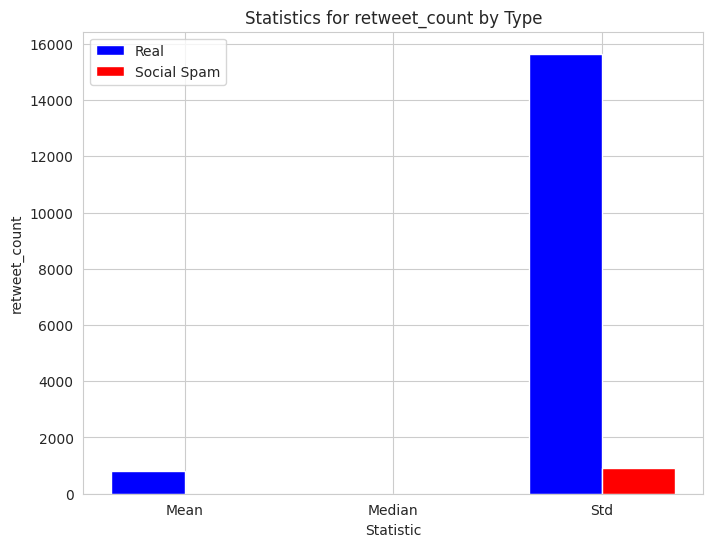

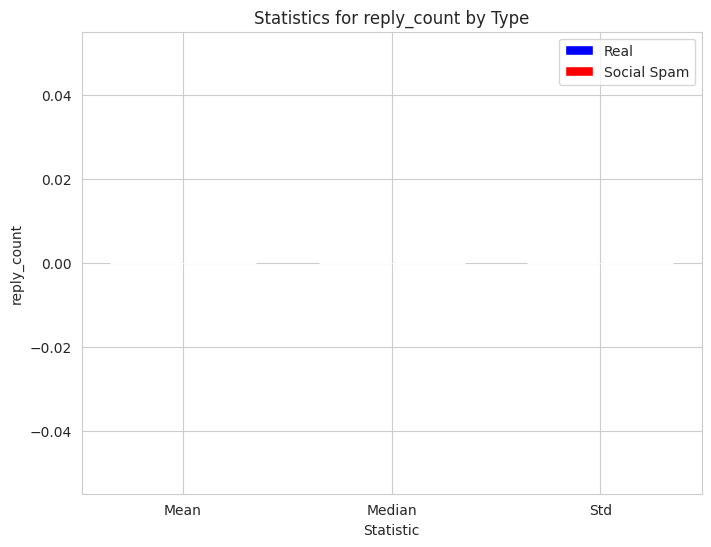

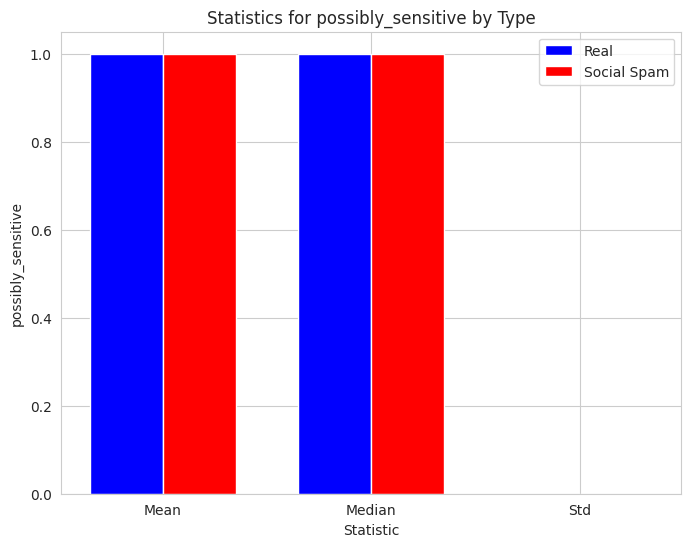

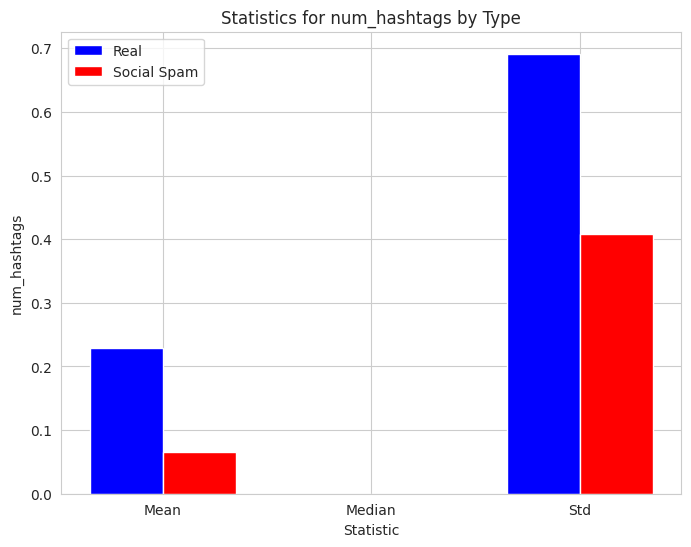

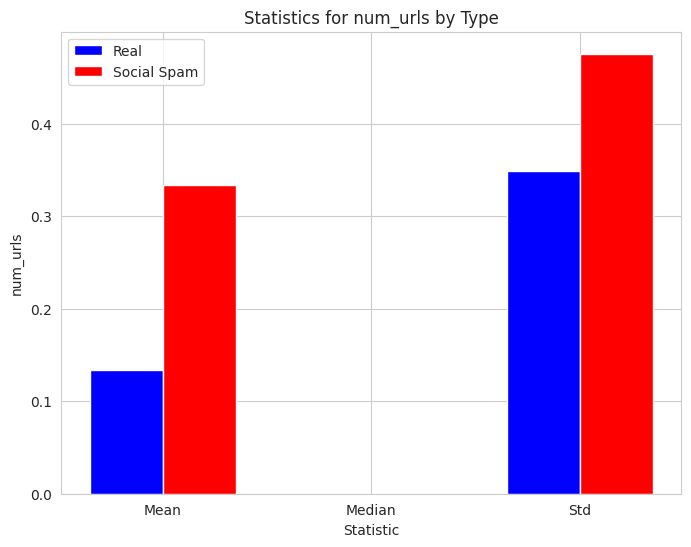

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate statistics for each feature separately
stats_real = df[df['type'] == 'real'][features].agg(['mean', 'median', 'std'])
stats_spam = df[df['type'] == 'social_spam'][features].agg(['mean', 'median', 'std'])

# Plot bar graphs for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    bar_width = 0.35
    index = np.arange(3)

    plt.bar(index, stats_real[feature], bar_width, label='Real', color='b')
    plt.bar(index + bar_width, stats_spam[feature], bar_width, label='Social Spam', color='r')

    plt.title(f'Statistics for {feature} by Type')
    plt.xlabel('Statistic')
    plt.ylabel(feature)
    plt.xticks(index + bar_width / 2, ['Mean', 'Median', 'Std'])
    plt.legend()
    plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['favourites_count']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.9876287165133988
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Important Features**
Favorites Count

In [17]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        real       0.99      0.99      0.99   1540611
 social_spam       0.97      0.97      0.97    404458

    accuracy                           0.99   1945069
   macro avg       0.98      0.98      0.98   1945069
weighted avg       0.99      0.99      0.99   1945069



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['statuses_count']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.9859624517176512
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['followers_count']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.9189391224681489
Predicted type for new tweet: social_spam


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
del model  # Delete the existing model

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['friends_count']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.940888472336971
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
del model  # Delete the existing model

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['favourites_count']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.9876287165133988
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
del model  # Delete the existing model

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['listed_count']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.7937080895330706
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
del model  # Delete the existing model

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['retweet_count']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.7920515930283193
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
del model  # Delete the existing model

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['reply_count']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.7920598189575794
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
del model  # Delete the existing model

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['num_hashtags']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.7920598189575794
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
del model  # Delete the existing model

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the target variable and features
X = df[['num_urls']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

Accuracy: 0.7920598189575794
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df.dropna(subset=['possibly_sensitive'], inplace=True)

# Define the target variable and features
X = df[['possibly_sensitive']]
y = df['type']

print(len(X))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predicting the type of a new tweet
new_tweet_favorites_count = 1200
prediction = model.predict([[new_tweet_favorites_count]])
print("Predicted type for new tweet:", prediction[0])

48592
Accuracy: 0.9522584628048153
Predicted type for new tweet: real


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
